<a href="https://colab.research.google.com/github/M-Sparsh-Mehra/upo-detection-numericalmethod/blob/main/test_upo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as mp
import numpy as np
from scipy.integrate import solve_ivp   # to solve lorenz system
from numpy.linalg import solve, norm   # to solve the matrix eqn

Lorenz System

In [ ]:
# parameters for the Lorenz system
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

def lorenz(t, state): # state variable holds current state
    x, y, z = state # space state
    #print(state)
    #print(phi)
    # Lorenz equations
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z

    return np.array([dx, dy, dz])

Jcobian matrix

In [ ]:
#changes with each iteration as states changes ,
#but we need to only compute it after state eqn evolves till T.

def jacob(state):
    x,y,z=state
    J = np.array([[-sigma, sigma, 0],
                    [rho - z, -1, -x],
                    [y, x, -beta]])

    return J.flatten()

In [ ]:
def findupo(x0, T0, max_iter=1000, tol=1e-5, m=1):
    x = np.array(x0)  # Current guess for the point on the UPO
    T = T0  # Current guess for the period

################################################################################
################################################################################
    for i in range(max_iter):

        #solving the sytem "lorenz eqns" for time T (guessed time period in the current iteration)
        sol = solve_ivp(lorenz, [0, T], x, method='RK45')

        # final state at T time of evolution of system
        phi_T= sol.y[:3, -1]  # Final state at time T

        #Jacobian at T time of evolution of system
        J = jacob(phi_T).reshape((3, 3))  # Jacobian matrix at time T

        # error fn
        H = phi_T - x

################################################################################
        #constructing linear systewm
        F_phi_T = np.array([sigma * (phi_T[1] - phi_T[0]),
                            phi_T[0] * (rho - phi_T[2]) - phi_T[1],
                            phi_T[0] * phi_T[1] - beta * phi_T[2]])  # F(phi_T)

        F_phi= np.array([sigma * (x[1] - x[0]),
                             x[0] * (rho - x[2]) - x[1],
                             x[0] * x[1] - beta * x[2]])
        # A amtrix
        A = np.zeros((4, 4))
        A[:3, :3] = J - np.eye(3)
        A[:3, 3] = F_phi_T
        A[3, :3] = F_phi

        # B matrix
        B = np.zeros(4)
        B[:3] = -H
        B[3] = 0  # Orthogonality constraint

 ###############################################################################
        # solving for corrections
        delta = solve(A, B)
        delta_x = delta[:3]
        delta_T = delta[3]
################################################################################
        # updating x and T with damping "m"
        x += 2**(-m) * delta_x
        T += 2**(-m) * delta_T

################################################################################
        # checking for convergence
        err_H = norm(H) # act error
        err_correction = norm(delta) #prac error
        if err_H < tol and err_correction < tol:
            print("Converged")
            print("iterations: ",i+1)
            return x, T, err_H, err_correction
            break
        if i == max_iter - 1:
            print("Did not converge")
            return x, T


look for UPOs

In [ ]:
## guess state and time period
x0 = [0.1, 0.5, 16.0] #guess state
T0 = 3  # Approximate period

upo, period ,err_H,err_correction= findupo(x0, T0)
print("UPO found:", upo)
print("Period:", period)
print("err1: ", err_H)
print("err2: ", err_correction)

Converged
iterations:  569
UPO found: [ 0.30866376  0.77138896 15.97734681]
Period: 3.0249752934198075
err1:  9.914696024631389e-06
err2:  5.470947654052179e-07


Plot

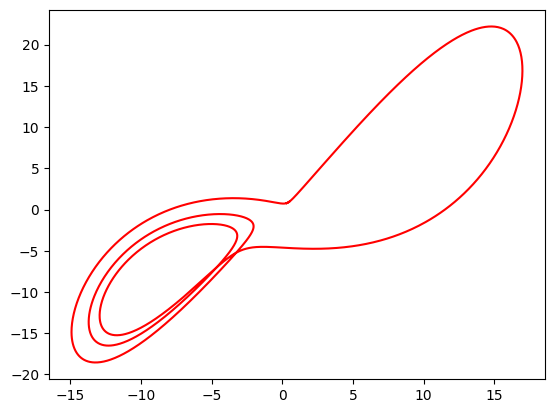

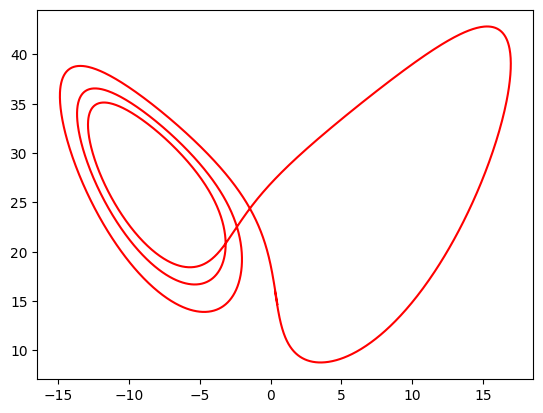

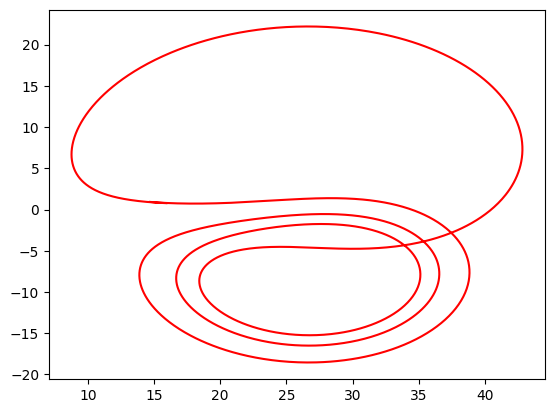

In [ ]:
x=upo[0]
y=upo[1]
z=upo[2]

X=[]
Y=[]
Z=[]

#parameters
s=10 #sigma
b=8/3 #beta
r=28 #rho

#grid step
dt=0.001

l=int(period/dt)

for i in range(l):
    dx=s*(y-x)*dt
    dy=( r*x-y-x*z)*dt
    dz=(x*y-b*z)*dt
    x=x+dx
    y=y+dy
    z=z+dz
    X.append(x)
    Y.append(y)
    Z.append(z)

mp.plot(X,Y,color="red")
mp.show()

mp.plot(X,Z,color="red")
mp.show()

mp.plot(Z,Y,color="red")

mp.show()

interactive plot

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

# trajectory
fig.add_trace(go.Scatter3d(
    x=X,
    y=Y,
    z=Z,
    mode='lines',
    line=dict(color='blue', width=2),
    name='Trajectory'
))

# layout
fig.update_layout(
    title="3D Lorenz System Trajectory",
    scene=dict(
        xaxis_title="X-axis",
        yaxis_title="Y-axis",
        zaxis_title="Z-axis",
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the plot
fig.show()
